In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, fbeta_score, make_scorer
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import  cross_validate
from sklearn import tree
import graphviz 

# Project files

In [ ]:
sys.path.append('./drive/MyDrive/TFG/implementations/machine_learning_tfg/')

In [ ]:
from src.utils.model_metrics_generator import ModelMetricsGenerator
from src.utils.cross_validation_utils import CrossValidationMetricsResultPrinter
from src.utils.my_metrics import accuracy_precision_recall_specifity_f2_score

# Functions

In [ ]:
def plot_metrics(metrics, model_description):
    history_df = pd.DataFrame(metrics)
    history_df.loc[:, ['test_accuracy', 'test_recall']].plot()
    plt.title(f'Metrícas obtenidas por el modelo {model_description}.')
    plt.ylabel('Valor')
    plt.xlabel('iteraciones')
    plt.legend(title='', labels=['Precisión', 'Exhaustividad'])

# Load data

In [ ]:
input_data = pd.read_excel('/content/drive/MyDrive/TFG/implementations/machine_learning_tfg/data/prepared/prepared_ICU_Prediction.xlsx')
#input_data = pd.read_excel('./../data/prepared/prepared_ICU_Prediction.xlsx')
ground_truth = input_data['ICU']
sample_data = input_data.drop('ICU', axis=1)
train_data, test_data, train_truth, test_truth = train_test_split(sample_data, ground_truth, test_size=0.2, shuffle=True)

# Decision Tree models

In [ ]:
gini_model = tree.DecisionTreeClassifier(random_state=0)

model_metrics_generator = ModelMetricsGenerator(test_data, test_truth)
gini_model = model_metrics_generator.generate_metrics(gini_model, train_data, train_truth)
model_metrics_generator.print_results()


Fit time: 0.1196s.
Predict time: 0.0019s.
Accuracy: 87.27%.
Precision: 81.71%.
Recall: 77.01%.
Specificity: 92.02%.
F2-score: 77.91%.


In [ ]:

class_names = {0:'No UCI', 1:'UCI'}
dot_data = tree.export_graphviz(gini_model,
                     feature_names=sample_data.columns,  
                     class_names=class_names,   
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("UCI_Decision_tree") 

'UCI_Decision_tree.pdf'

In [ ]:
entropy_model = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)

model_metrics_generator = ModelMetricsGenerator(test_data, test_truth)
entropy_model = model_metrics_generator.generate_metrics(entropy_model, train_data, train_truth)
model_metrics_generator.print_results()


Fit time: 0.124s.
Predict time: 0.0017s.
Accuracy: 86.55%.
Precision: 79.76%.
Recall: 77.01%.
Specificity: 90.96%.
F2-score: 77.55%.


## Cross validation models


Valores medios:
	Fit time: 0.1572s.
	Test time: 0.0067s
	Accuracy: 71.8%.
	Precision: 57.59%.
	Recall: 61.42%.
	Specificity: 76.97%.
	F2 score: 60.16%.


0.1572
0.0067
71.8
57.59
61.42
76.97
60.16


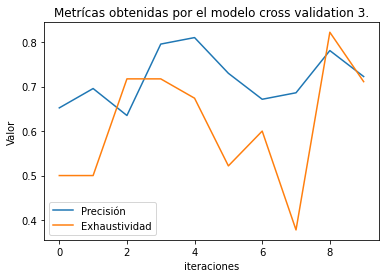

In [ ]:
metrics = accuracy_precision_recall_specifity_f2_score()

cv_model = tree.DecisionTreeClassifier()
cv_results = cross_validate(cv_model, sample_data, ground_truth, cv=10, scoring=metrics, n_jobs=-1)

printer = CrossValidationMetricsResultPrinter()
printer.print_metrics_report(cv_results)

plot_metrics(cv_results, 'cross validation 3')


Valores medios:
	Fit time: 0.1572s.
	Test time: 0.008s
	Accuracy: 69.9%.
	Precision: 54.55%.
	Recall: 56.35%.
	Specificity: 76.63%.
	F2 score: 55.83%.


0.1572
0.008
69.9
54.55
56.35
76.63
55.83


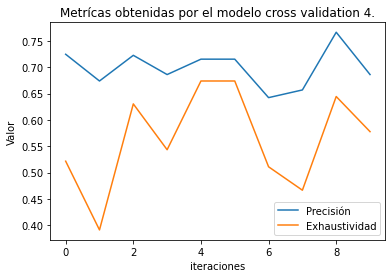

In [ ]:
cv_model2 = tree.DecisionTreeClassifier(class_weight={0:1, 1:10})
cv_results2 = cross_validate(cv_model2, sample_data, ground_truth, cv=10, scoring=metrics, n_jobs=-1)

printer = CrossValidationMetricsResultPrinter()
printer.print_metrics_report(cv_results2)

plot_metrics(cv_results2, 'cross validation 4')


Valores medios:
	Fit time: 0.1216s.
	Test time: 0.0069s
	Accuracy: 73.91%.
	Precision: 60.19%.
	Recall: 63.18%.
	Specificity: 79.26%.
	F2 score: 62.36%.


0.1216
0.0069
73.91
60.19
63.18
79.26
62.36


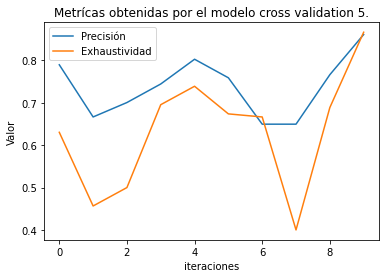

In [ ]:
cv_model3 = tree.DecisionTreeClassifier(class_weight={0:1, 1:3})
cv_results3 = cross_validate(cv_model3, sample_data, ground_truth, cv=10, scoring=metrics, n_jobs=-1)

printer = CrossValidationMetricsResultPrinter()
printer.print_metrics_report(cv_results3)

plot_metrics(cv_results3, 'cross validation 5')